In [3]:
%load_ext autoreload
%autoreload 2
import warnings 
warnings.filterwarnings('ignore')

import lmp
import plotter
import analysis
import lmpsetup
import numpy as np

# Summary

The main points of focus of this week are the same as last weeks, since the two last points were not achieved :

1. Compare the CPEB4 analogs to obtain possible differences in **radius of gyration** and **contacts** between them. In particular, we want to compare 12D_CPEB4_D4 vs CPEB4_D4 and 7D_CPEB4 vs CPEB4. 


2. Perform a simplistic minimization of parameters to **maximize the distance between the radius of gyration of the CPEB4 analogs to obtain which I, HPS Scale and epsilon give a clearest difference between the analogs.**


3. Finally, initiate the analysis of multichain simulations (x2 and x5), **trying** to find the **interchain contacts** and possibly the **binodals of all analogs**.

### 1. CPEB4 Analogs comparison

We just wish to include here the CPEB4x2 and CPEB4x5 cases:

In [3]:
# d = '/home/adria/perdiux/prod/lammps/dignon/CPEB4x2/'
# protein = 'CPEB4'
# small_set = lmpsetup.LMPSetup(oliba_wd=d, protein=protein, chains=2, temper=True)
# small_set.temperatures = np.round(np.linspace(300,500,12), 2).tolist()
# small_set.get_hps_pairs()
# small_set.write_hps_files(slurm=False)

In [4]:
# d = '/home/adria/perdiux/prod/lammps/dignon/CPEB4x5/'
# protein = 'CPEB4'
# small_set = lmpsetup.LMPSetup(oliba_wd=d, protein=protein, chains=5, temper=True)
# small_set.temperatures = np.round(np.linspace(300,500,12), 2).tolist()
# small_set.get_hps_pairs()
# small_set.write_hps_files(slurm=False)

In [5]:
# d = '/home/adria/perdiux/prod/lammps/dignon/CPEB4x50-24-v2/'
# protein = 'CPEB4'
# small_set = lmpsetup.LMPSetup(oliba_wd=d, protein=protein, chains=50, temper=True)
# small_set.temperatures = np.round(np.linspace(300,400,24), 2).tolist()
# small_set.get_pdb_xyz(pdb='/home/adria/scripts/lammps/data/equil/CPEB4.pdb')
# small_set.get_hps_pairs()
# small_set.write_hps_files()

First let's look the basic available data for each variant (**flory**, **rg**, **dij's** and **intrachain contacts**) :

In [4]:
plotty = plotter.Plotter()
plotty.index

Protein    I   Eps  Scale            Name  \
0   12D_CPEB4_D4  100  80.0    1.0  1.0ls-100I-80e   
1       7D_CPEB4  100  80.0    1.0  1.0ls-100I-80e   
2          CPEB4  100  80.0    1.0  1.0ls-100I-80e   
3       CPEB4_D4  100  80.0    1.0  1.0ls-100I-80e   
4    CPEB4x50-24  100  80.0    1.0     CPEB4x50-24   
5       CPEB4x50  100  10.0    1.0  1.0ls-100I-10e   
6       CPEB4x50  100  80.0    1.0  1.0ls-100I-80e   
7            TDP  100  80.0    1.0             TDP   
8           TEST  100  80.0    1.0            TEST   
9           TEST  100  80.0    1.0        7D_CPEB4   
10          TEST  100  80.0    1.0           CPEB4   
11          TEST  100  80.0    1.0      S_7D_CPEB4   
12          TEST  100  80.0    1.0      S_7D_CPEB4   

                                             FullPath  
0   /home/adria/data/prod/lammps/12D_CPEB4_D4/1.0l...  
1   /home/adria/data/prod/lammps/7D_CPEB4/x1/1.0ls...  
2   /home/adria/data/prod/lammps/CPEB4/x1/1.0ls-10...  
3   /home/adria/data/prod/lammps/CPEB4_D4/1.0ls-10...  
4            /home/adria/data/prod/lammps/CPEB4x50-24  
5   /home/adria/data/prod/lammps/CPEB4x50/1.0ls-10...  
6   /home/adria/data/prod/lammps/CPEB4x50/1.0ls-10...  
7                    /home/adria/data/prod/lammps/TDP  
8                   /home/adria/data/prod/lammps/TEST  
9          /home/adria/data/prod/lammps/TEST/7D_CPEB4  
10            /home/adria/data/prod/lammps/TEST/CPEB4  
11       /home/adria/data/prod/lammps/TEST/S_7D_CPEB4  
12       /home/adria/data/prod/lammps/TEST/S_7D_CPEB4

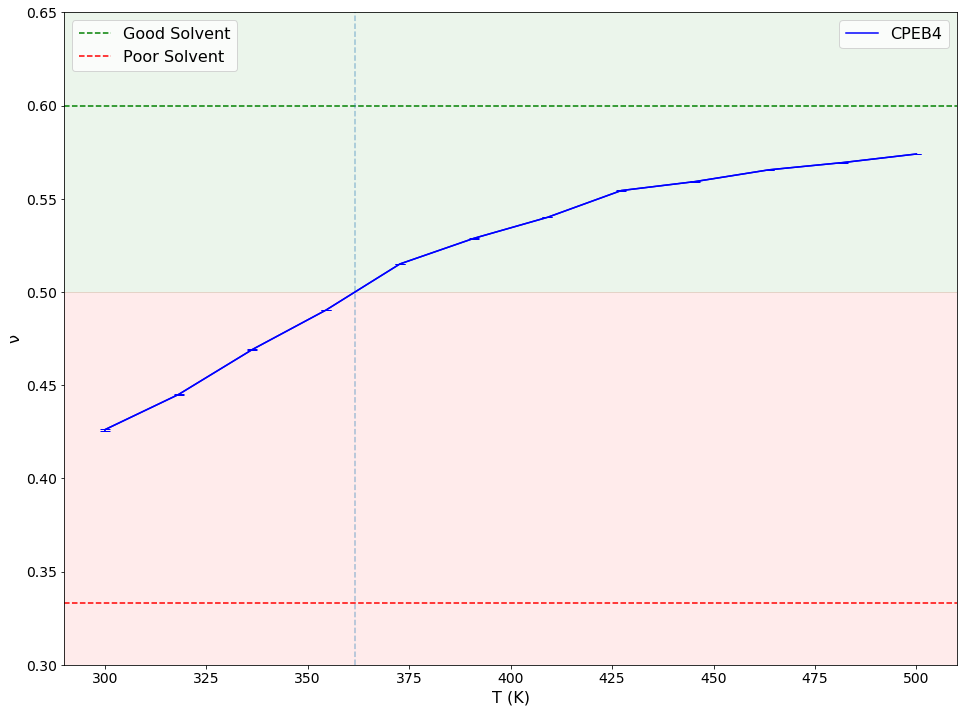

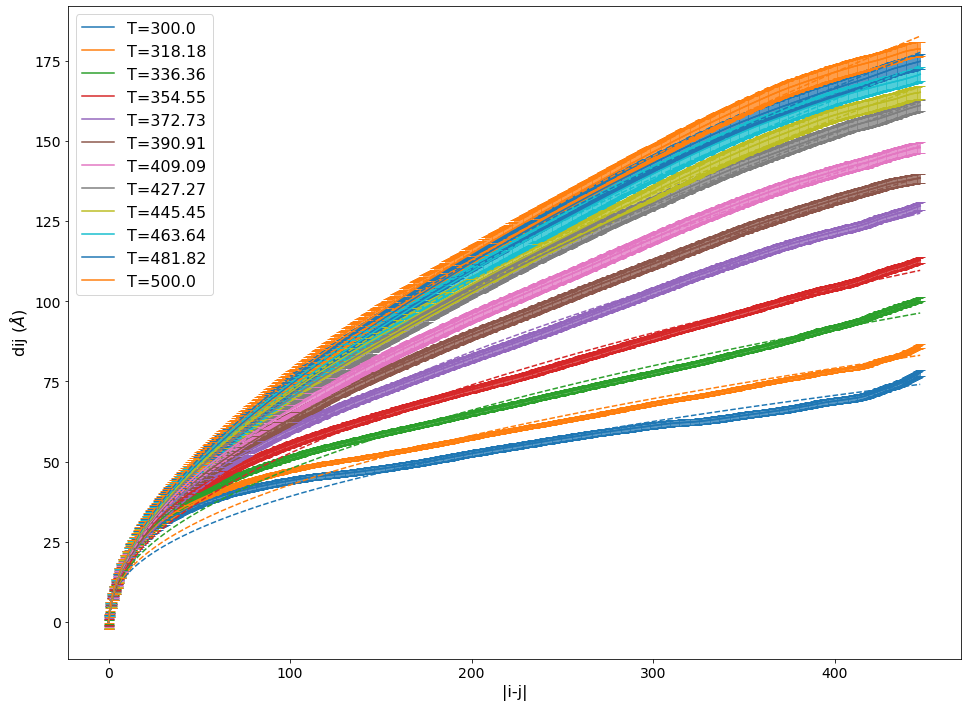

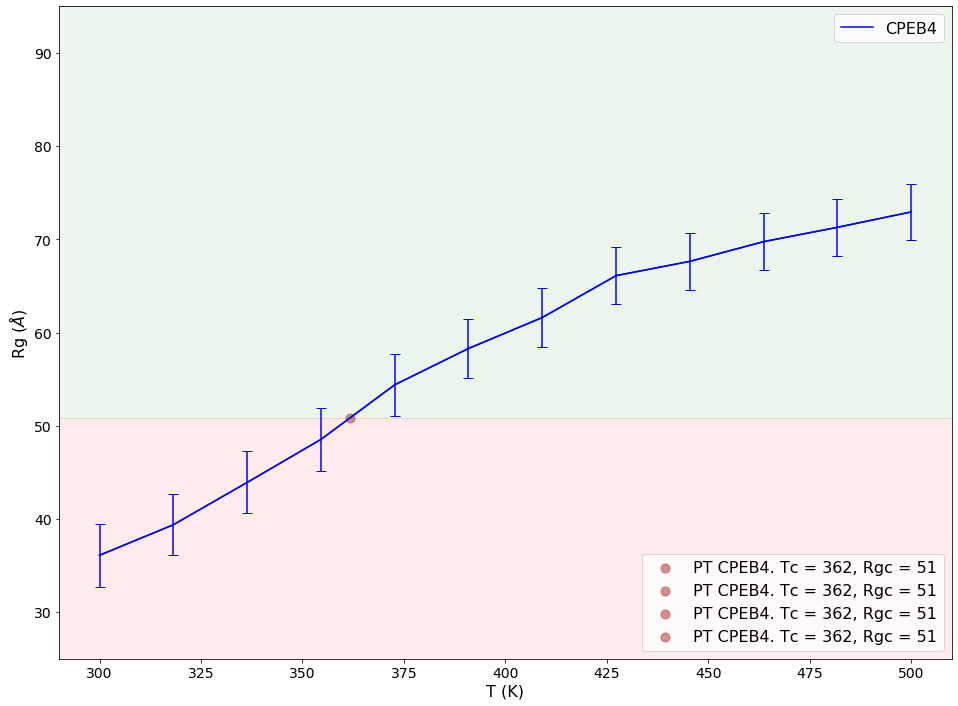

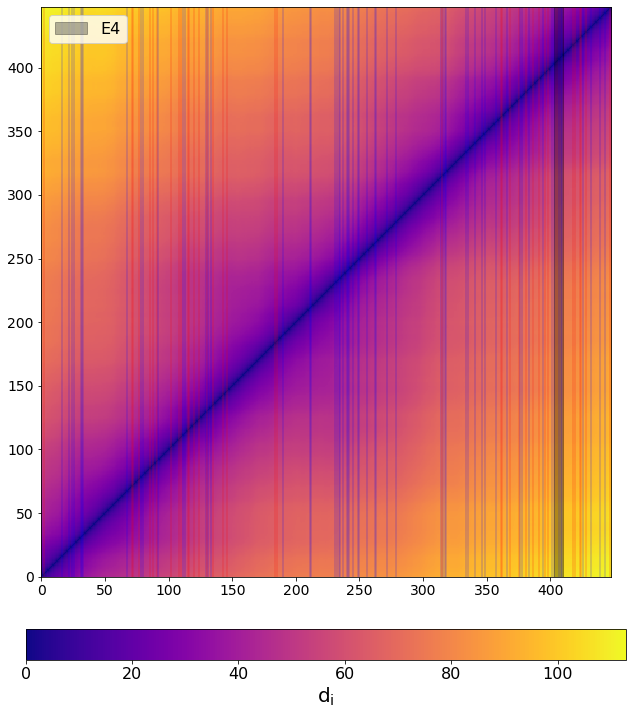

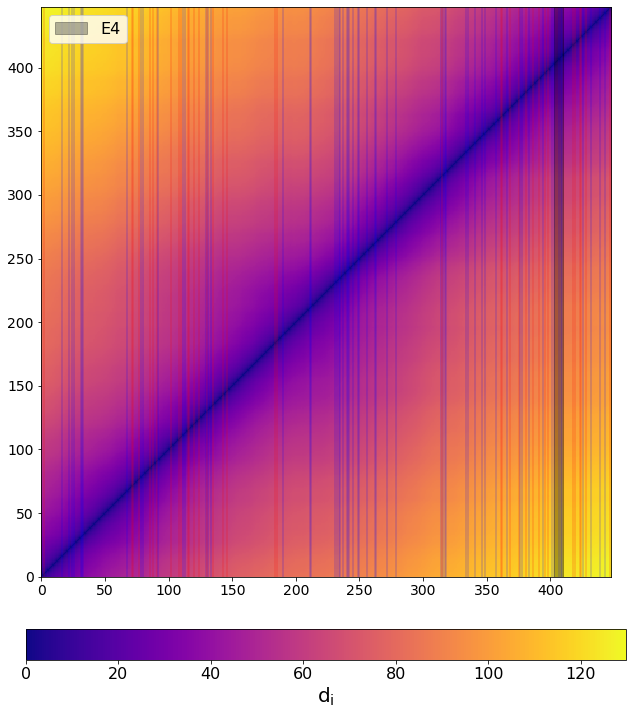

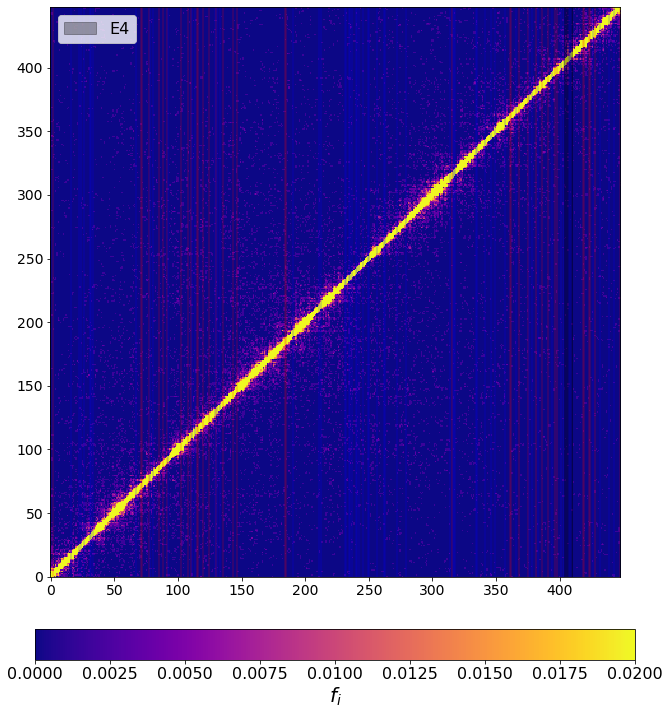

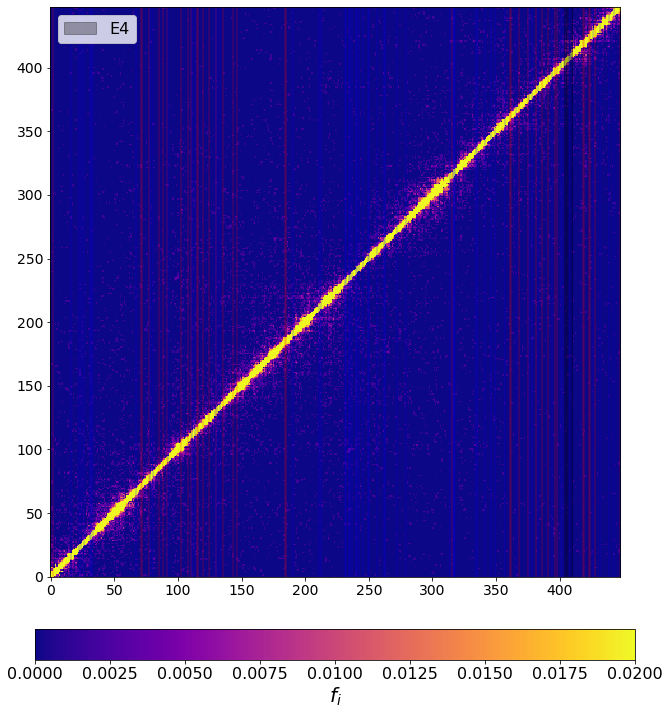

In [19]:
## CPEB4
plotty.clean()
plotty.plot(observable='flory', index=2, plot_id='fl-CPEB4', label="CPEB4", color="blue")
plotty.plot(observable='dij', index=2, plot_id='dij-CPEB4',  label="CPEB4")
plotty.plot(observable='rg', index=2, plot_id='rg-CPEB4',  label="CPEB4", color="blue")
# Tc seems to be between 3 and 4, so check the contacts for these two temperatures 
plotty.plot(observable='distance_map', index=2, plot_id='C3CPEB4',  temperature=3)
plotty.plot(observable='distance_map', index=2, plot_id='C4CPEB4',  temperature=4)
plotty.plot(observable='distance_map', index=2, plot_id='CC3CPEB4',  temperature=3, contacts=True)
plotty.plot(observable='distance_map', index=2, plot_id='CC4CPEB4',  temperature=4, contacts=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


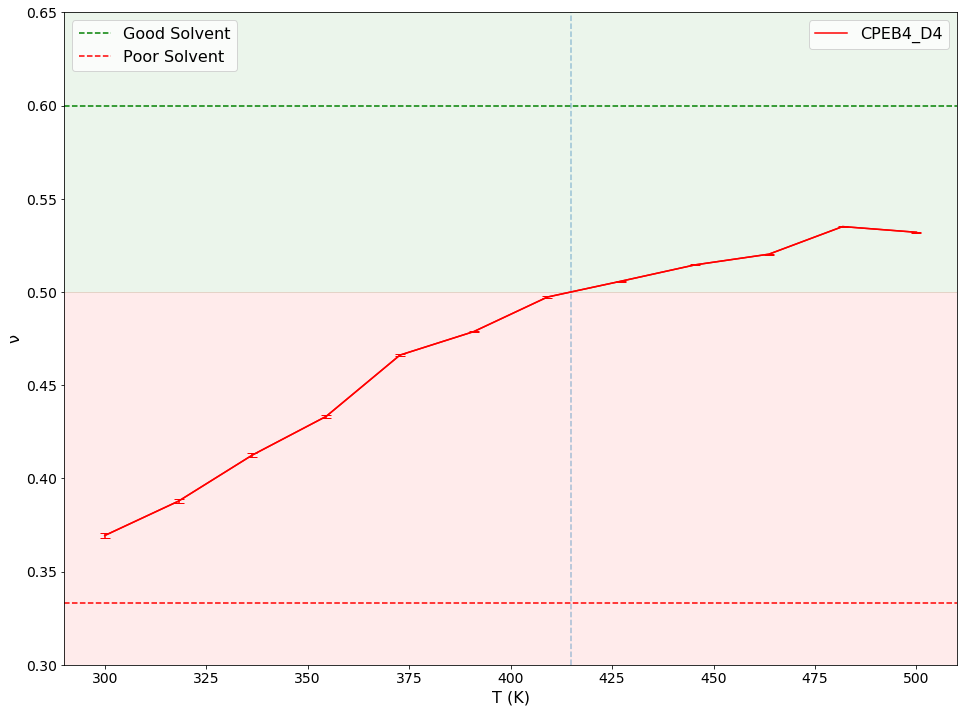

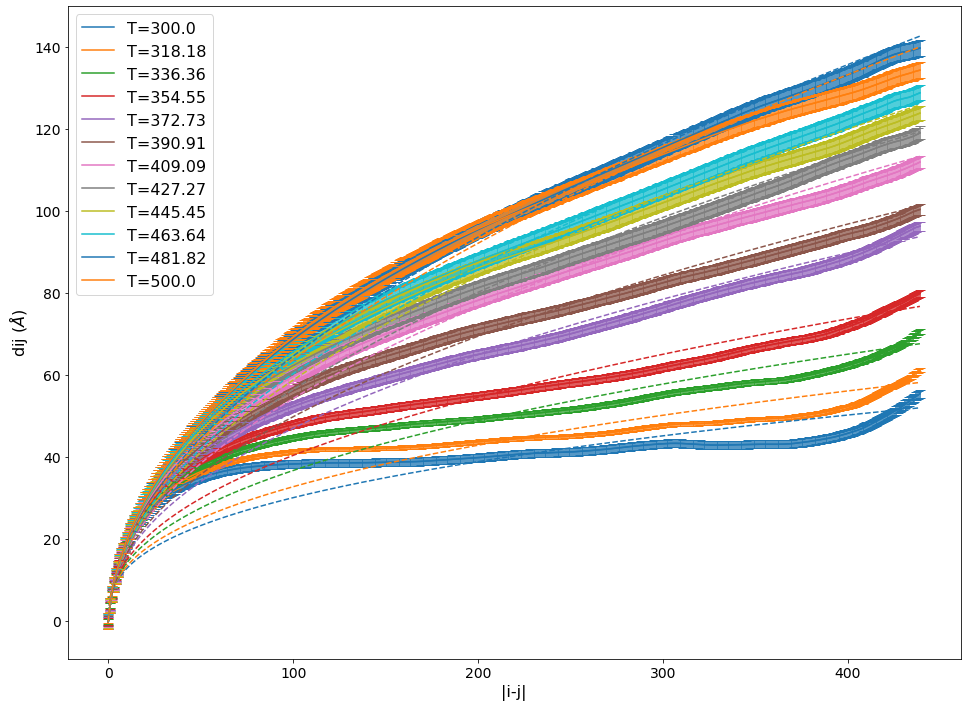

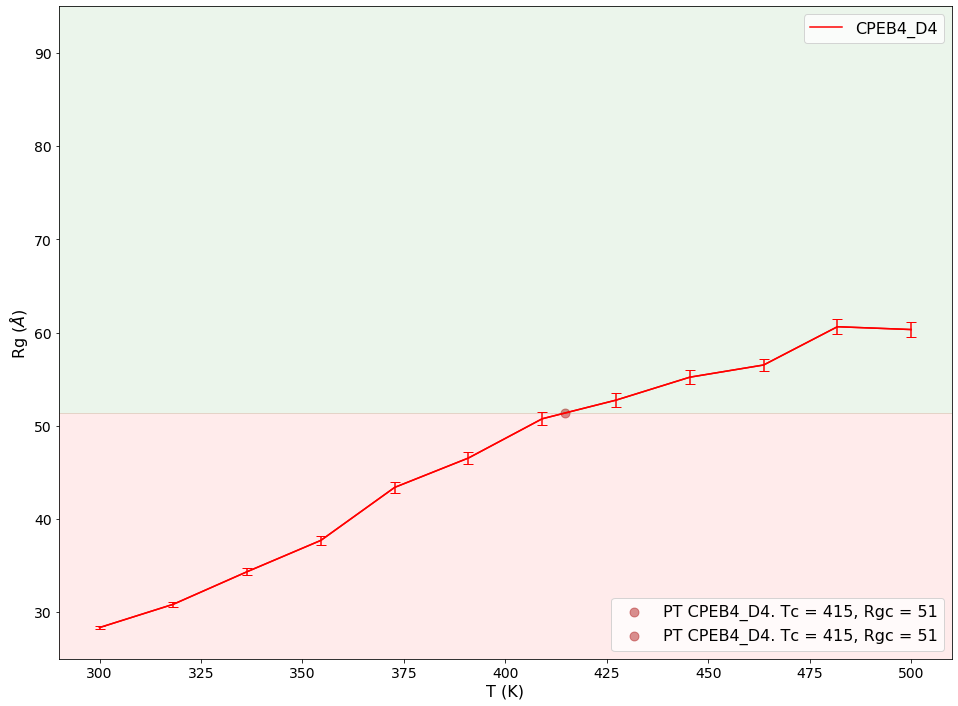

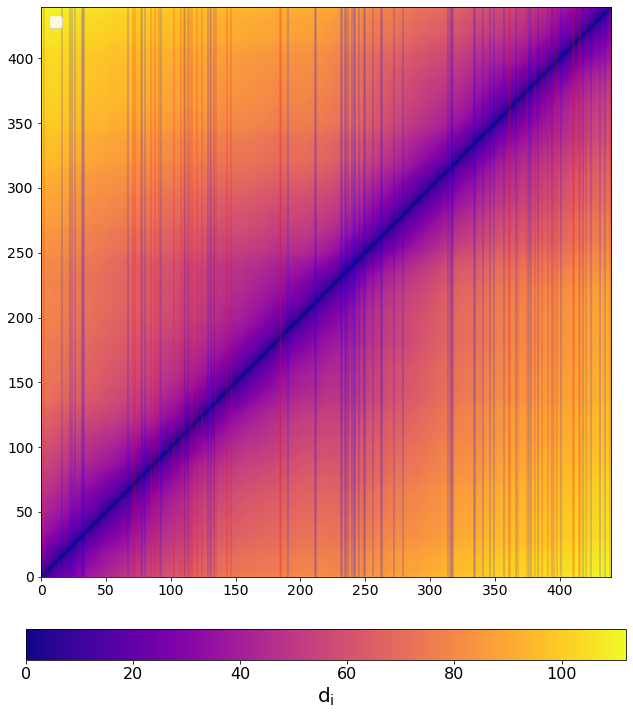

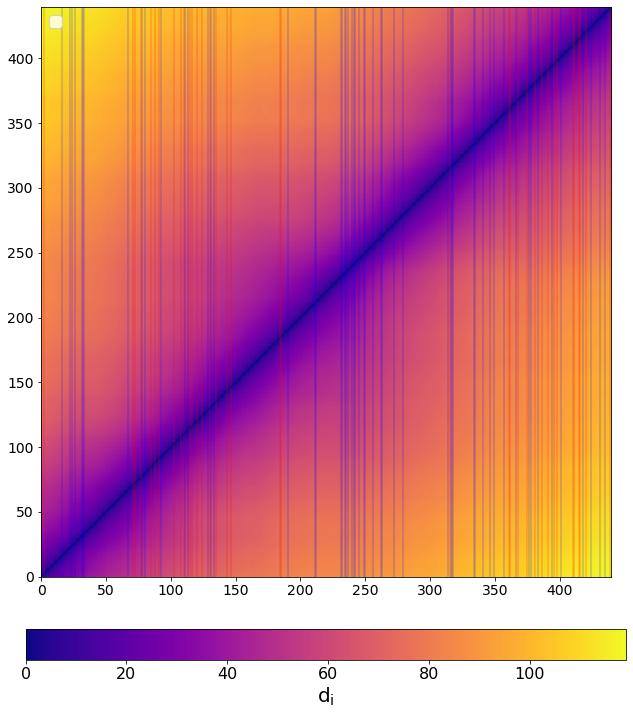

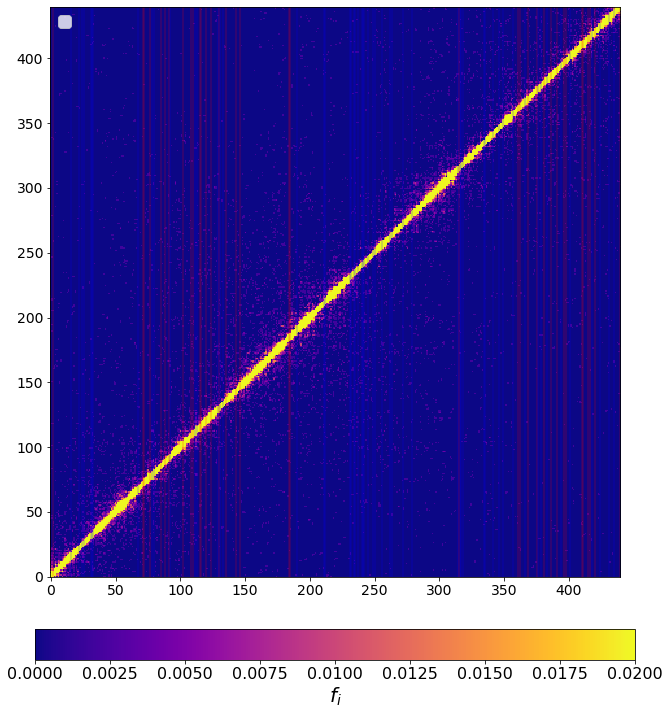

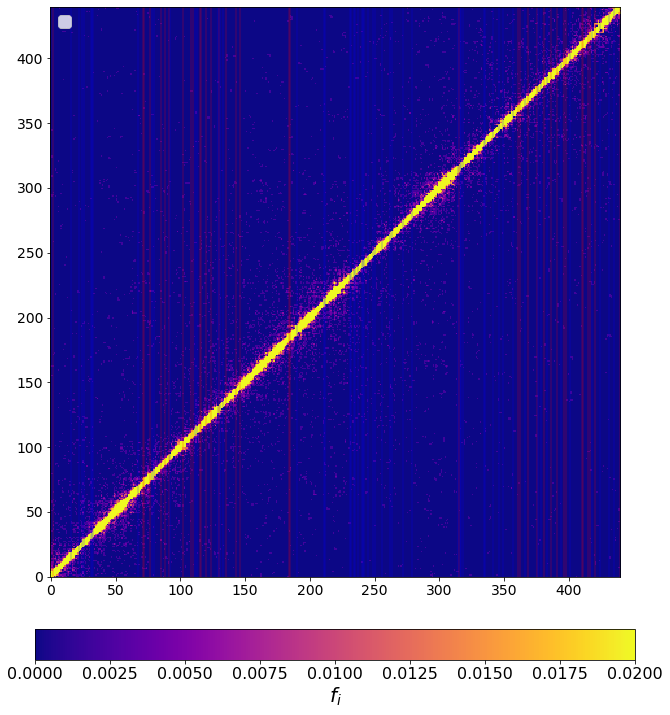

In [30]:
## CPEB4_D4
plotty.clean()
plotty.plot(observable='flory', index=3, plot_id='fl-CPEB4_D4', label="CPEB4_D4", color="red")
plotty.plot(observable='dij', index=3, plot_id='dij-CPEB4_D4',  label="CPEB4_D4")
plotty.plot(observable='rg', index=3, plot_id='rg-CPEB4_D4',  label="CPEB4_D4", color="red")
# # Tc seems to be between 6 and 7, so check the contacts for these two temperatures 
plotty.plot(observable='distance_map', index=3, plot_id='C6CPEB4_D4',  temperature=6)
plotty.plot(observable='distance_map', index=3, plot_id='C7CPEB4_D4',  temperature=7)
plotty.plot(observable='distance_map', index=3, plot_id='CC6CPEB4_D4',  temperature=6, contacts=True)
plotty.plot(observable='distance_map', index=3, plot_id='CC7CPEB4_D4',  temperature=7, contacts=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


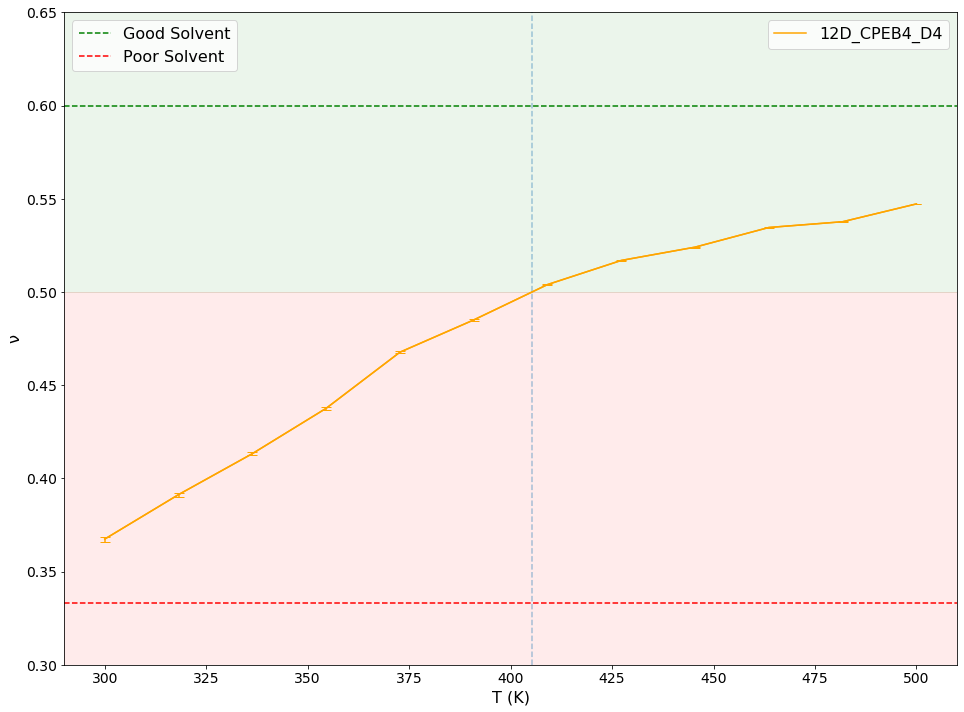

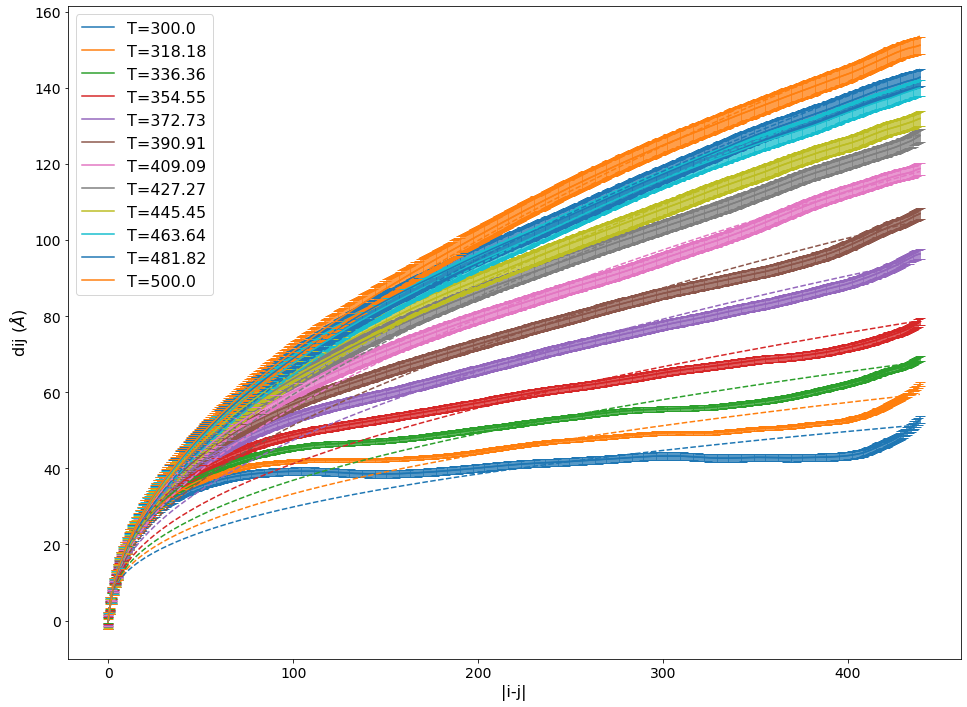

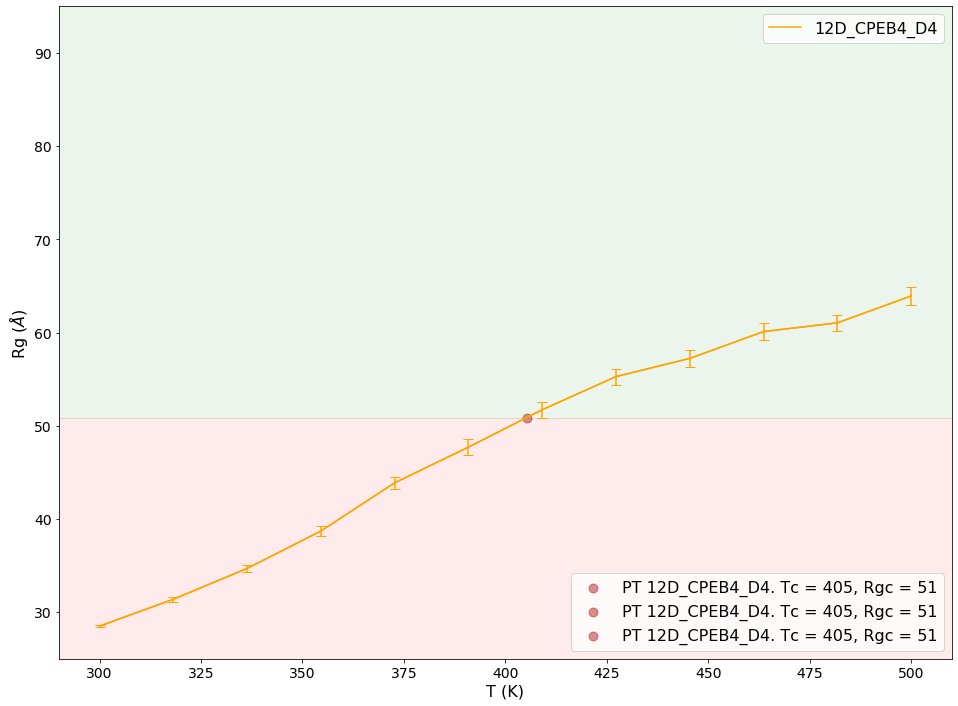

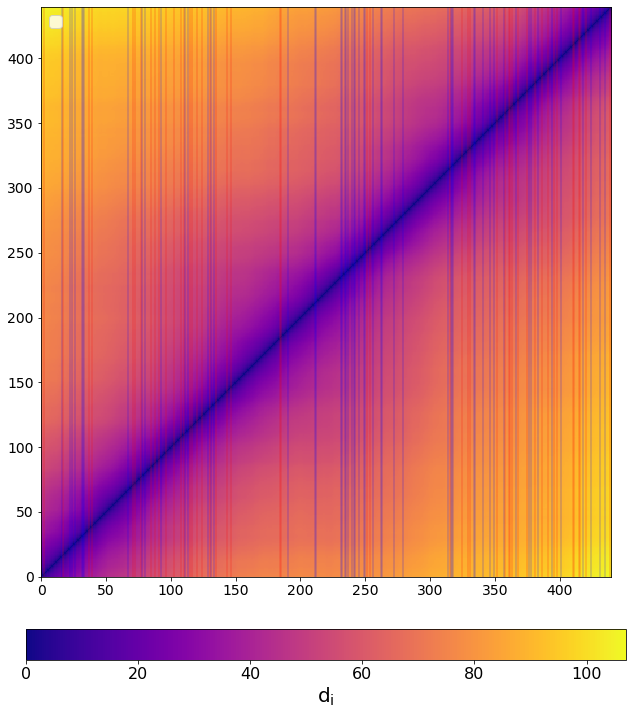

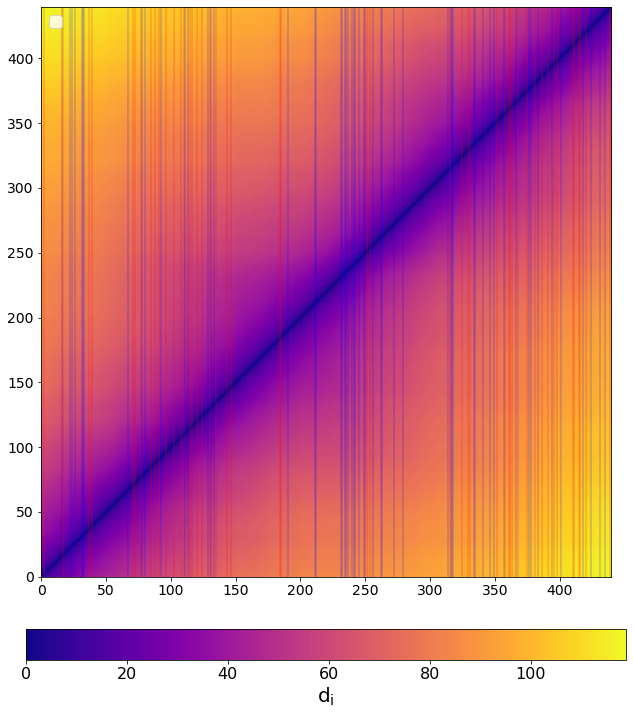

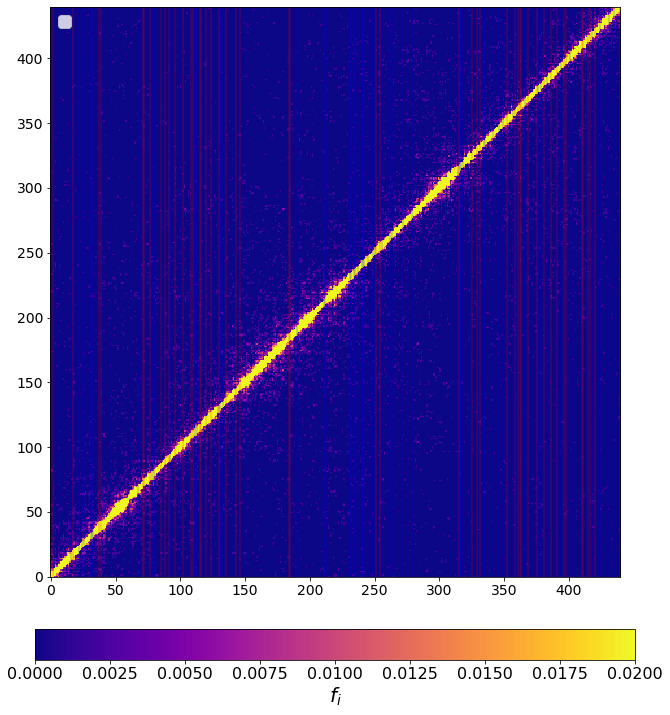

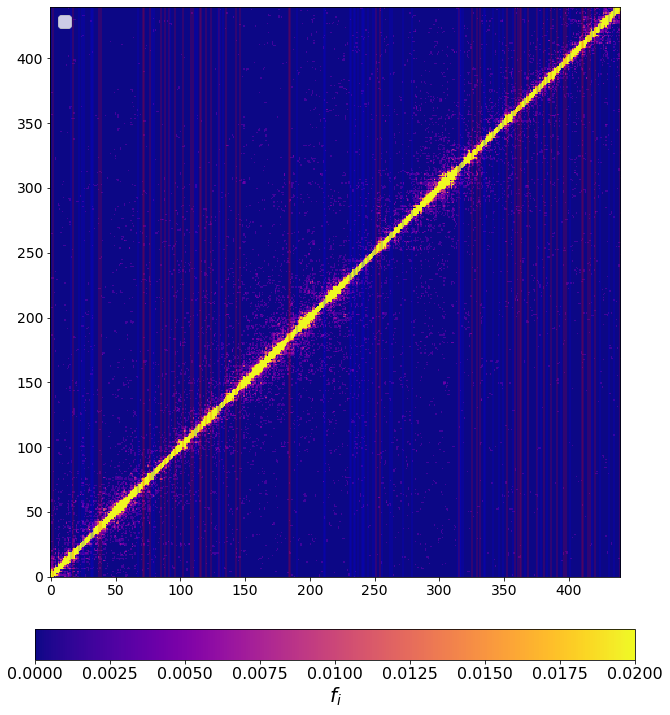

In [33]:
## 12D_CPEB4_D4
plotty.clean()
plotty.plot(observable='flory', index=0, plot_id='fl-12D_CPEB4_D4', label="12D_CPEB4_D4", color="orange")
plotty.plot(observable='dij', index=0, plot_id='dij-12D_CPEB4_D4',  label="12D_CPEB4_D4")
plotty.plot(observable='rg', index=0, plot_id='rg-12D_CPEB4_D4',  label="12D_CPEB4_D4", color="orange")
# # Tc seems to be between 5 and 6, so check the contacts for these two temperatures 
plotty.plot(observable='distance_map', index=0, plot_id='C512D_CPEB4_D4',  temperature=5)
plotty.plot(observable='distance_map', index=0, plot_id='C612D_CPEB4_D4',  temperature=6)
plotty.plot(observable='distance_map', index=0, plot_id='CC512D_CPEB4_D4',  temperature=5, contacts=True)
plotty.plot(observable='distance_map', index=0, plot_id='CC612D_CPEB4_D4',  temperature=6, contacts=True)

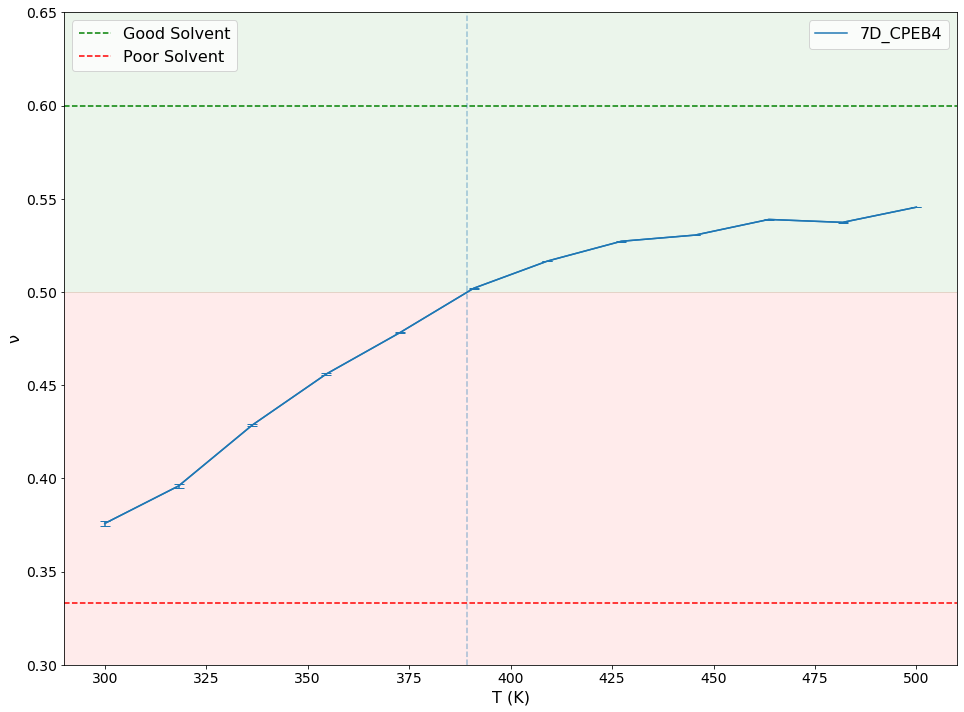

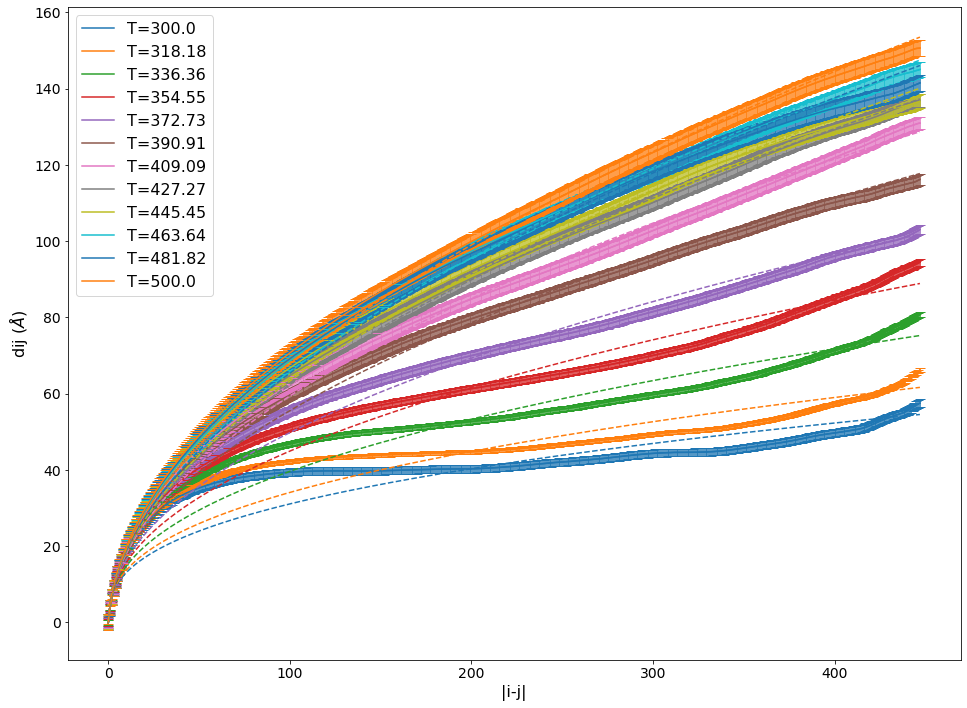

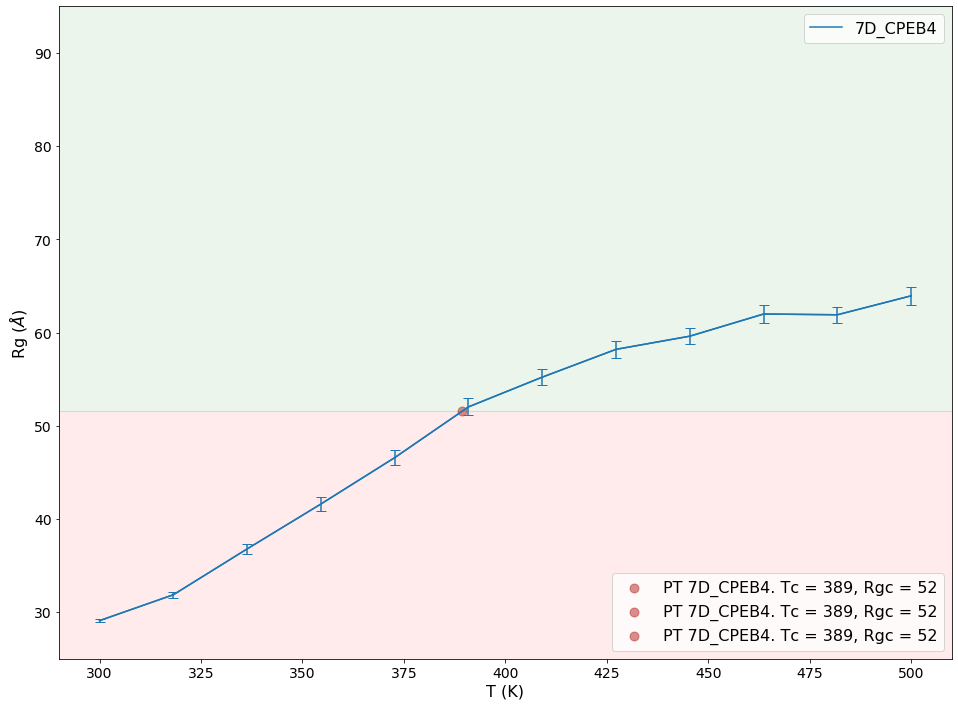

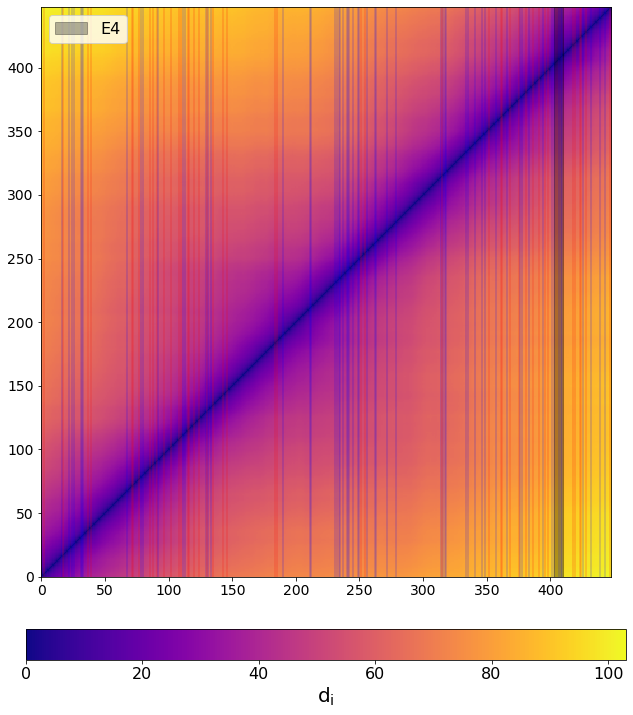

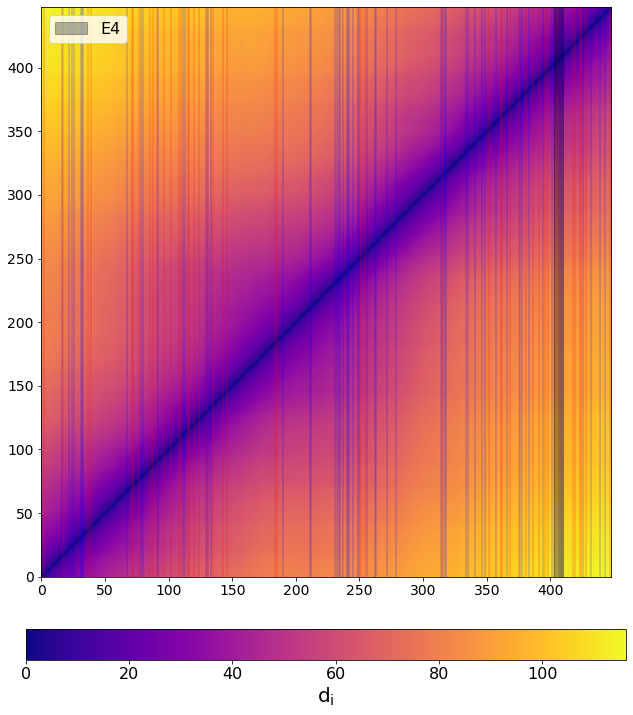

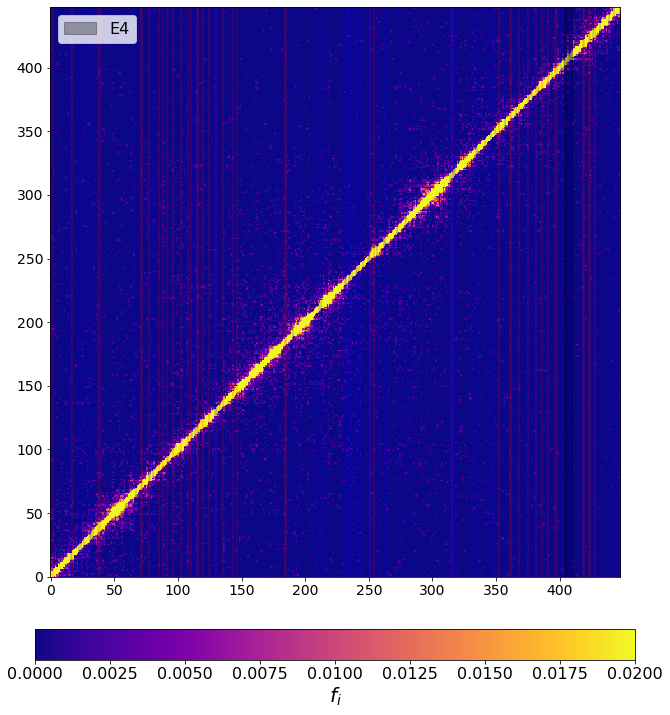

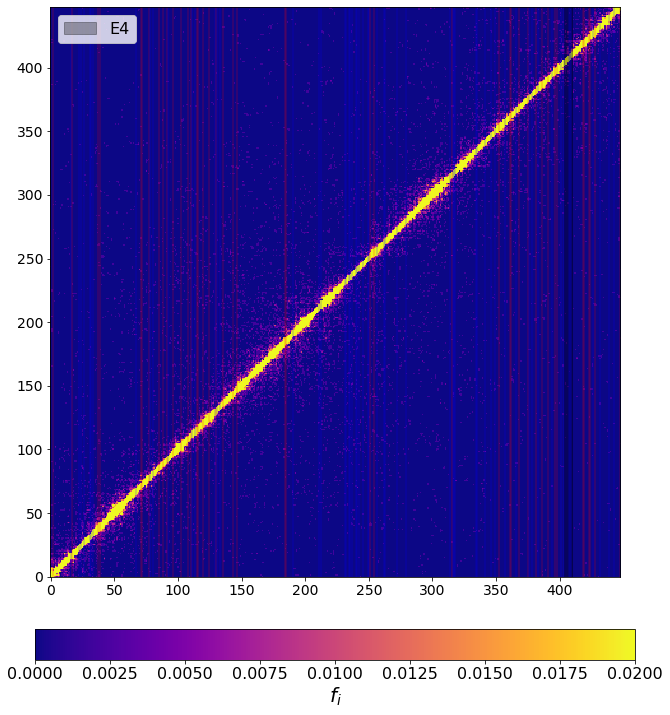

In [38]:
## 7D_CPEB4
plotty.clean()
plotty.plot(observable='flory', index=1, plot_id='fl-7D_CPEB4', label="7D_CPEB4", color="tab:blue")
plotty.plot(observable='dij', index=1, plot_id='dij-7D_CPEB4',  label="7D_CPEB4")
plotty.plot(observable='rg', index=1, plot_id='rg-7D_CPEB4',  label="7D_CPEB4", color="tab:blue")
# Tc seems to be between 4 and 5, so check the contacts for these two temperatures 
plotty.plot(observable='distance_map', index=1, plot_id='C37D_CPEB4',  temperature=4)
plotty.plot(observable='distance_map', index=1, plot_id='C47D_CPEB4',  temperature=5)
plotty.plot(observable='distance_map', index=1, plot_id='CC37D_CPEB4',  temperature=4, contacts=True)
plotty.plot(observable='distance_map', index=1, plot_id='CC47D_CPEB4',  temperature=5, contacts=True)

Now, let's compare **explicit analogs**. The main relevant ones are WT vs D4, 12D vs D4 and 7D vs WT. **flory's** are : 

And **radius' of giration**

array([[29.13671021, 26.73645518, 24.85126221, ..., 26.56928978,
        28.36110828, 31.89328774],
       [29.48014064, 28.07910986, 28.12233728, ..., 33.75236798,
        32.43803531, 35.53918546],
       [37.24523235, 29.0793167 , 34.90921156, ..., 37.06307618,
        36.19918458, 39.0830594 ],
       ...,
       [76.22103103, 52.15793038, 50.93039481, ..., 68.60248744,
        51.77534043, 51.92818917],
       [64.44665582, 64.3923267 , 66.02275945, ..., 64.82709278,
        57.89780407, 60.81807232],
       [62.24588914, 72.10926403, 73.99099383, ..., 66.4775422 ,
        64.62504721, 65.04871059]])

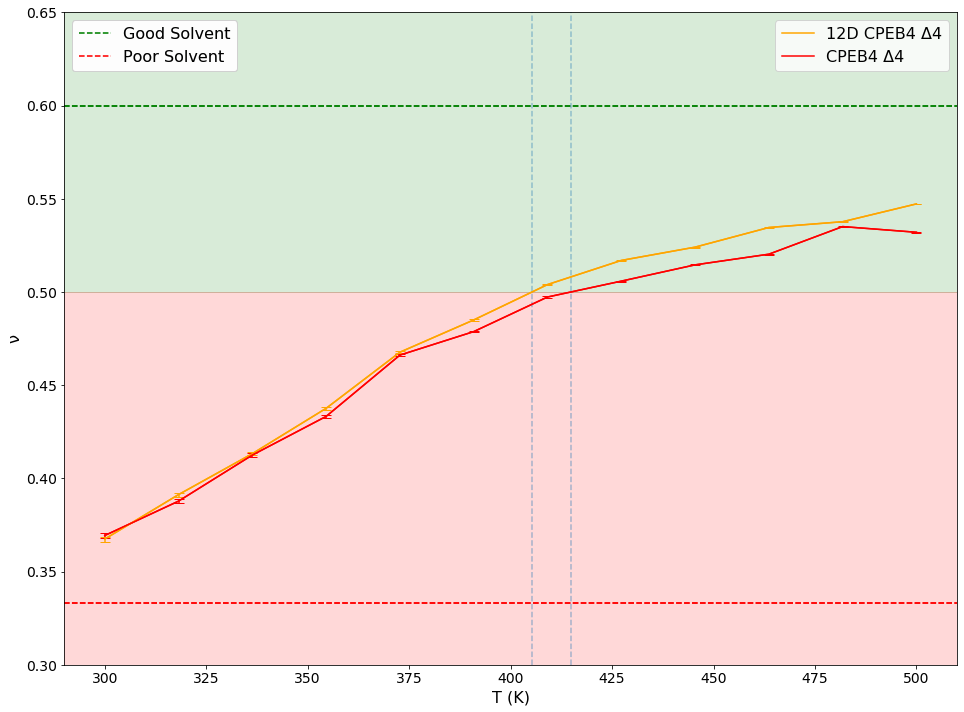

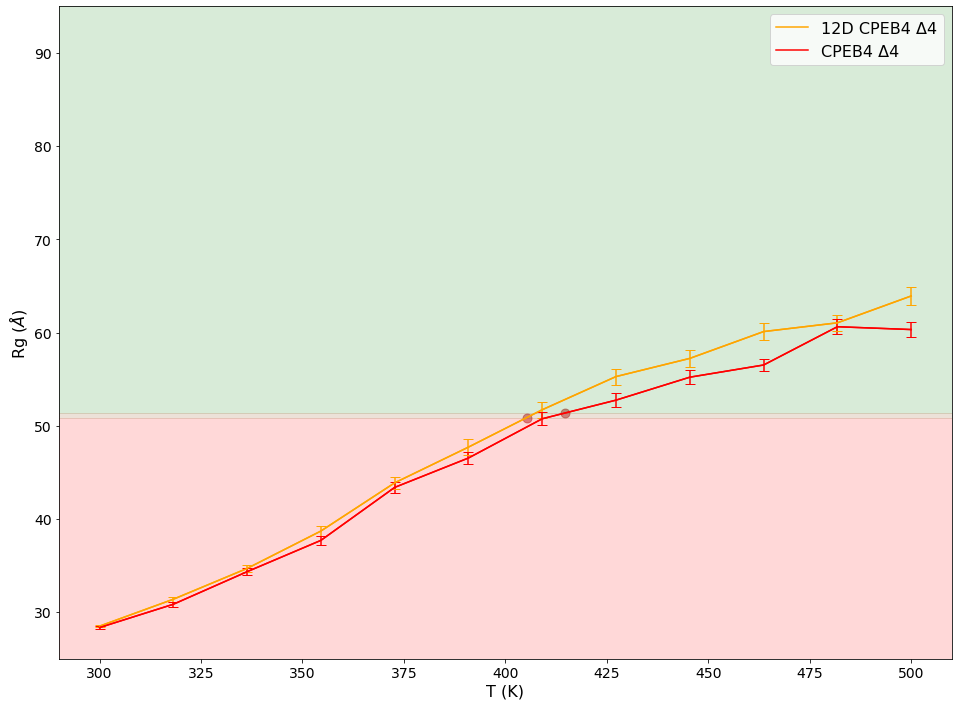

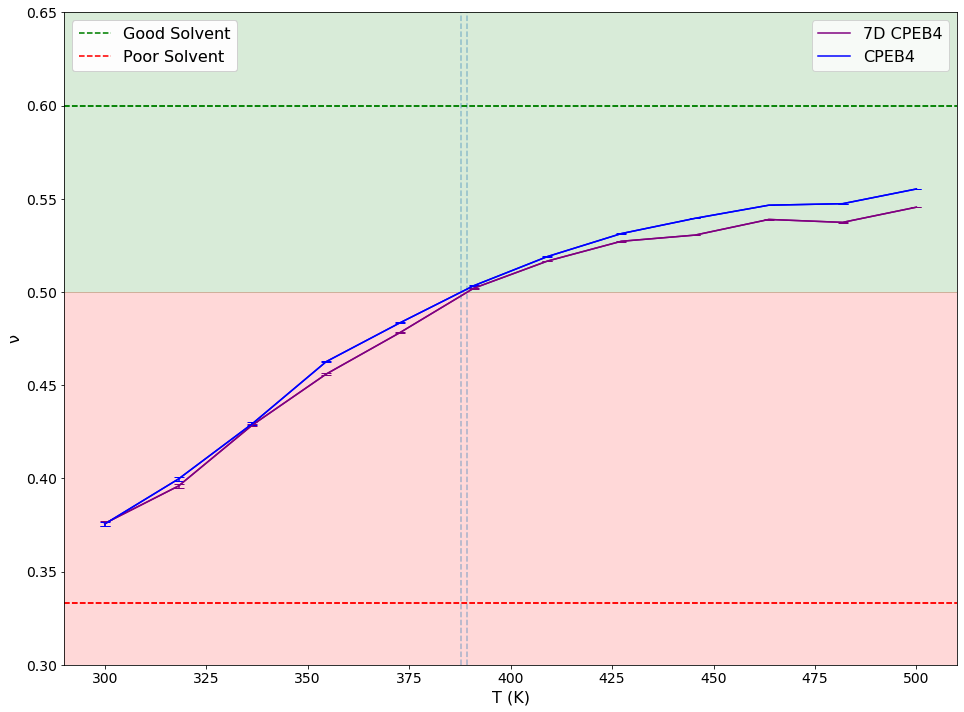

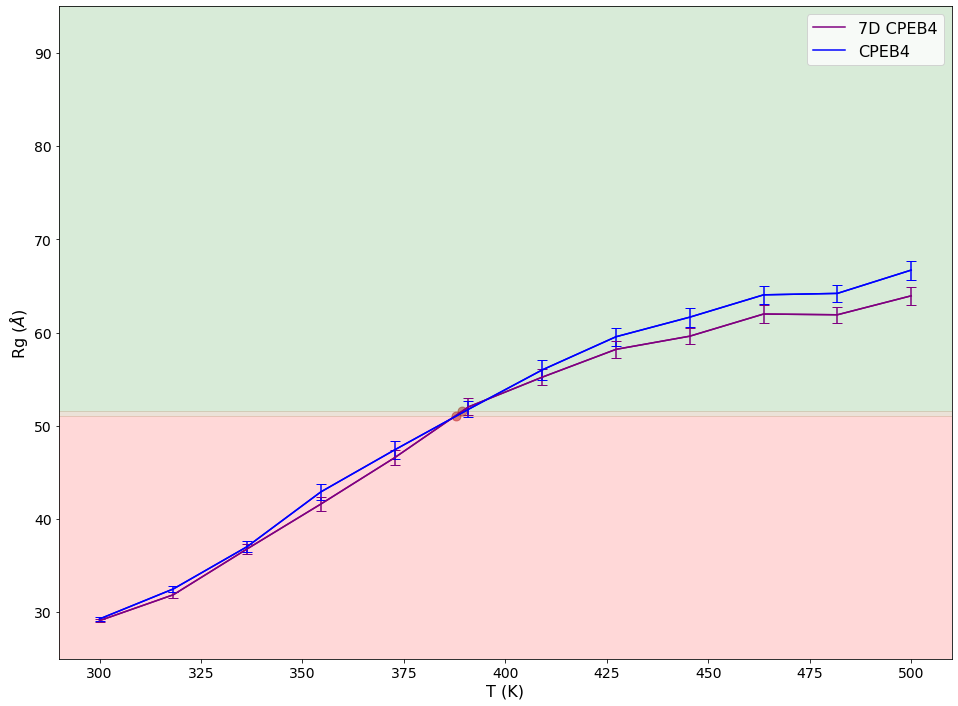

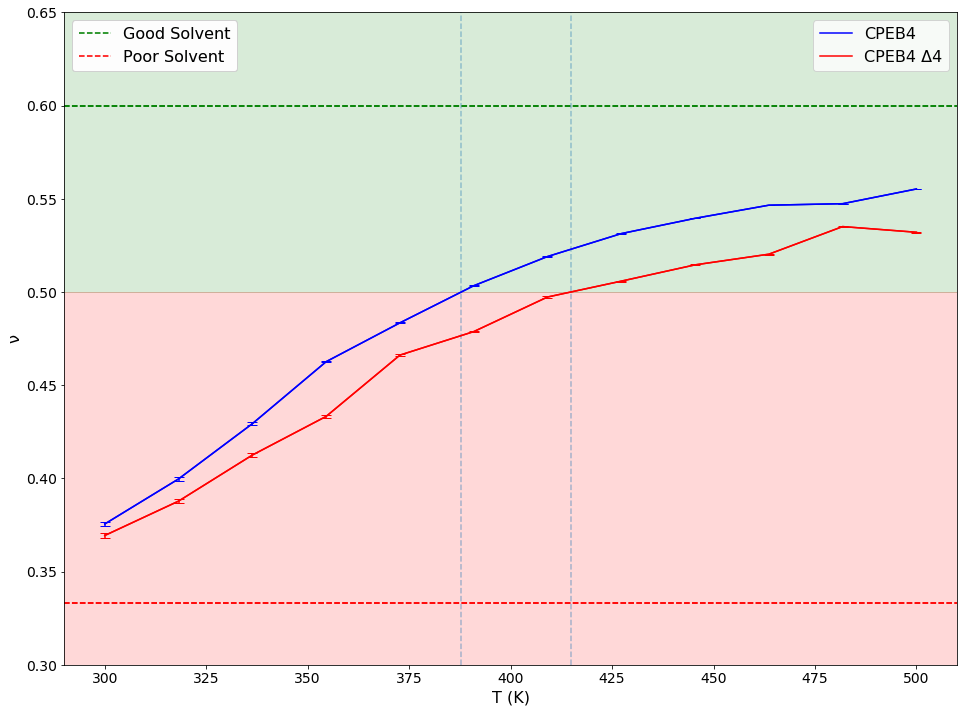

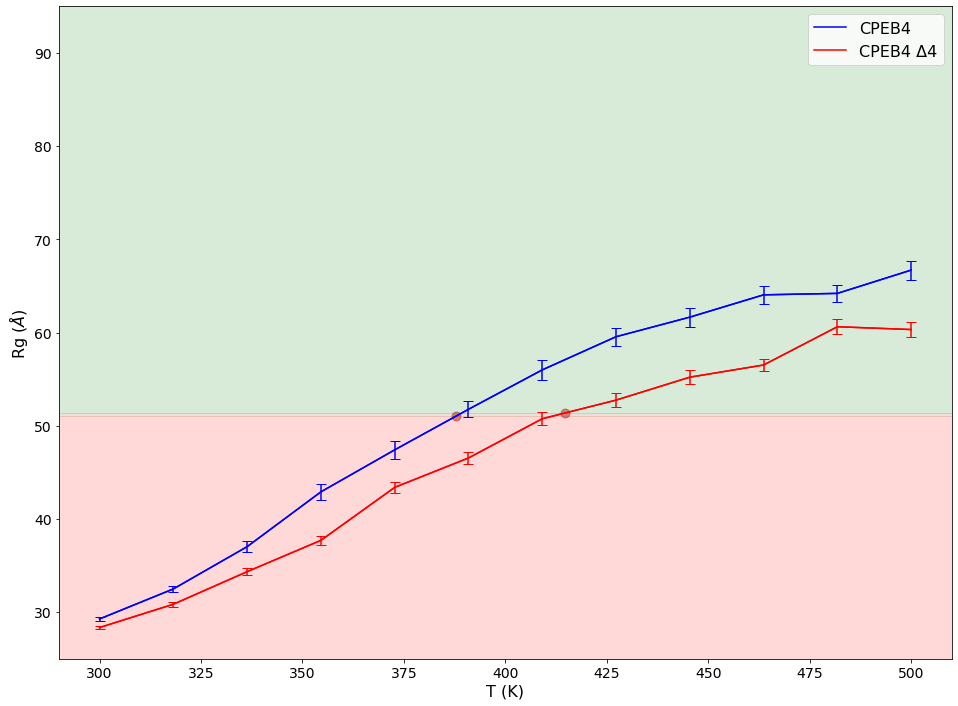

In [6]:
plotty.clean()

plotty.plot('flory', 0, plot_id=0, label='12D CPEB4 Δ4', color='orange')
plotty.plot('flory', 3, plot_id=0, label='CPEB4 Δ4', color='red')

plotty.plot('rg', 0, plot_id=10, label='12D CPEB4 Δ4', color='orange')
plotty.plot('rg', 3, plot_id=10, label='CPEB4 Δ4', color='red')

plotty.plot('flory', 1, plot_id=1, label='7D CPEB4', color='purple')
plotty.plot('flory', 2, plot_id=1, label='CPEB4', color='blue')

plotty.plot('rg', 1, plot_id=11, label='7D CPEB4', color='purple')
plotty.plot('rg', 2, plot_id=11, label='CPEB4', color='blue')

plotty.plot('flory', 2, plot_id=100, label='CPEB4', color='blue')
plotty.plot('flory', 3, plot_id=100, label='CPEB4 Δ4', color='red')

plotty.plot('rg', 2, plot_id=1100, label='CPEB4', color='blue')
plotty.plot('rg', 3, plot_id=1100, label='CPEB4 Δ4', color='red')

And **contact maps**

No handles with labels found to put in legend.
No handles with labels found to put in legend.


array([[ 0.        ,  0.        ,  0.12429772, ...,  0.        ,
         0.        ,         inf],
       [ 0.        ,  0.        ,  0.        , ...,         inf,
                inf,  0.        ],
       [ 0.12429772,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,         inf,  0.        , ...,  0.        ,
         0.        , -0.10414026],
       [ 0.        ,         inf,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [        inf,  0.        ,  0.        , ..., -0.10414026,
         0.        ,  0.        ]])

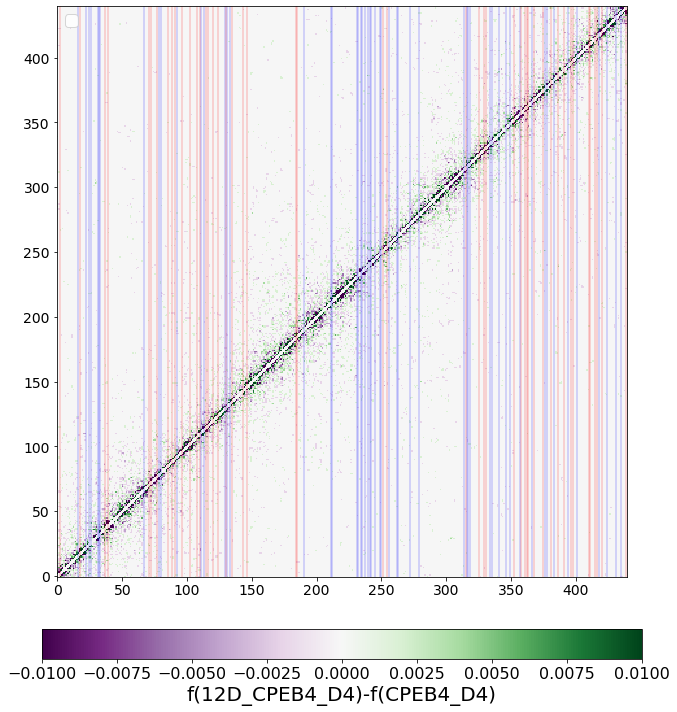

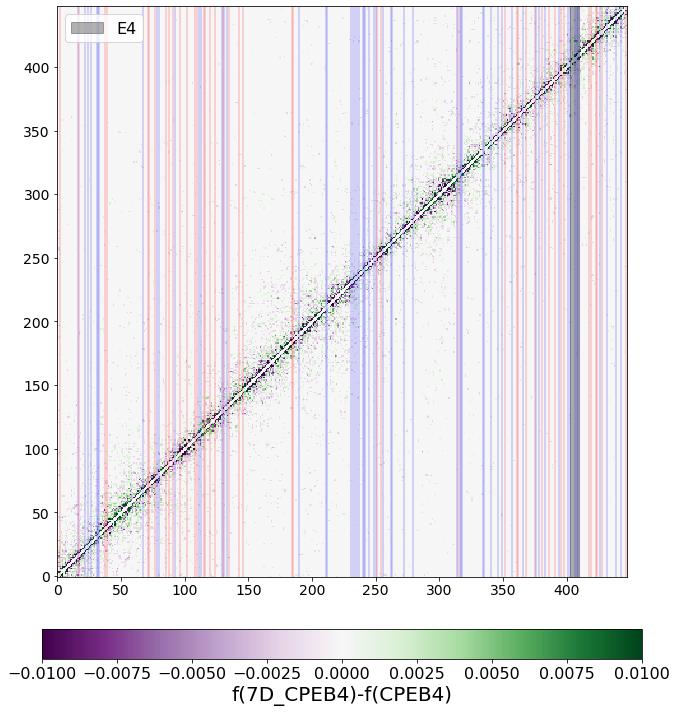

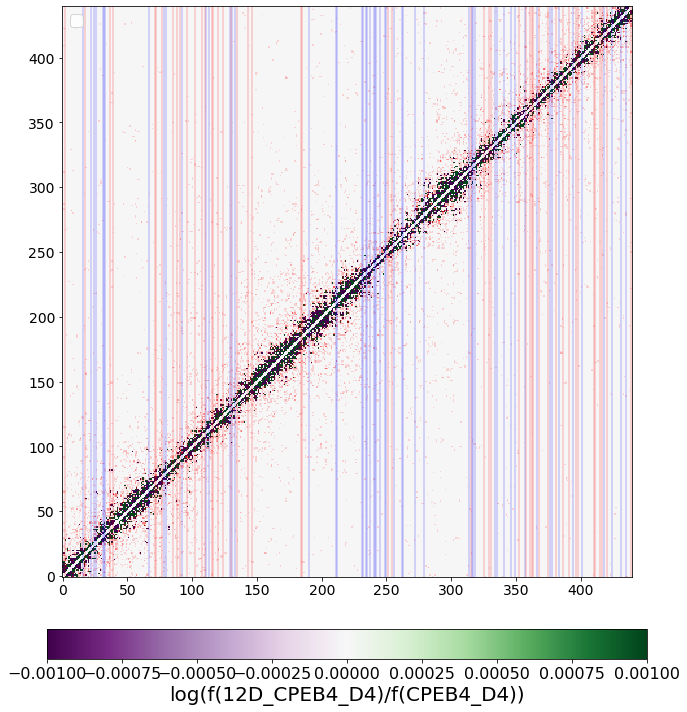

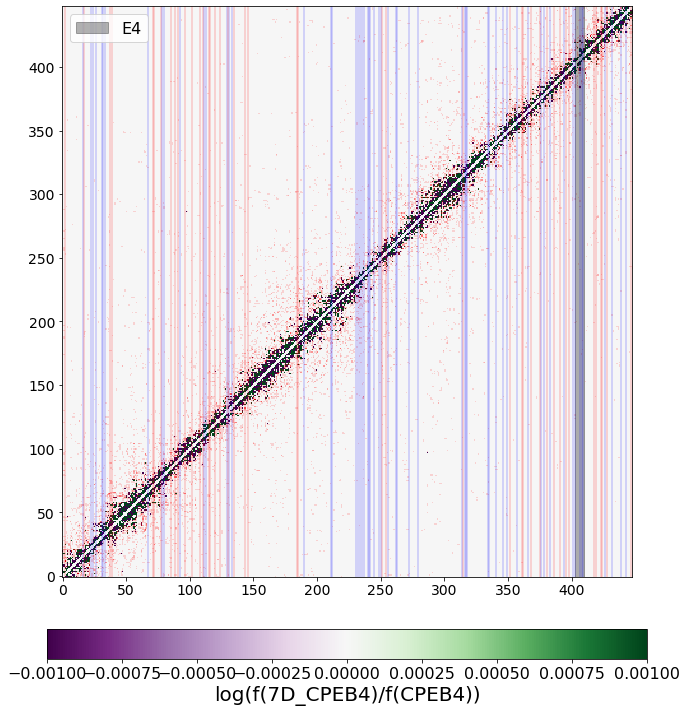

In [16]:
plotty.clean()
# plotty.plot('distance_map', 0, plot_id=4, contacts=False, index2=3)
# plotty.plot('distance_map', 1, plot_id=5, contacts=False, index2=2)
# plotty.plot('distance_map', 2, plot_id=5, contacts=False, index2=3)

plotty.plot('distance_map', 0, plot_id=6, label='12D CPEB4 Δ4', contacts=True, index2=3)
plotty.plot('distance_map', 1, plot_id=7, label='7D CPEB4', contacts=True, index2=2)

plotty.plot('distance_map', 0, plot_id=8, label='12D CPEB4 Δ4', contacts=True, index2=3, log=True)
plotty.plot('distance_map', 1, plot_id=9, label='7D CPEB4', contacts=True, index2=2, log=True)

### 2. Optimization of the difference between Rg of analogs

Here we want to sort of maximize the difference between radius of gyrations of CPEB4 analogs at a fixed temperature to define what experimental parameters are to be studied when considering criticality. We can minimize using my own methods :

In [39]:
minimizer = analysis.Analysis(oliba_wd=None)
min_result = minimizer.minimize_I_ls(a_dir='/home/adria/data/prod/lammps/12D_CPEB4_D4/x1/1.0ls-100I-80e', b_dir='/home/adria/data/prod/lammps/CPEB4_D4/x1/1.0ls-100I-80e')

Swapping progress : 99.99 %RGI,REWRG 33.5175713479909 33.51784883998984


In [44]:
minimizer = analysis.Analysis(oliba_wd=None)
min_result = minimizer.minimize_I_ls(a_dir='/home/adria/data/prod/lammps/12D_CPEB4_D4/1.0ls-100I-80e', b_dir='/home/adria/data/prod/lammps/CPEB4_D4/1.0ls-100I-80e')

57.98992081731103
54.293420431562964
FOR 0.7 0.2 above rg = 482.6635910398004 and below rg = 482.6635909814999
FOR 0.7 0.2000000149011612 above rg = 482.6635910398004 and below rg = 482.6635909814999
FOR 0.7000000149011611 0.2 above rg = 482.6635910397999 and below rg = 482.6635909814994
FOR 0.7 0.2 above rg = 482.6635910398004 and below rg = 482.6635909814999
FOR 0.8328125 0.2 above rg = 482.658828628393 and below rg = 482.6564554949244
FOR 0.8328125 0.2 above rg = 482.658828628393 and below rg = 482.6564554949244
FOR 0.8328125 0.2000000149011612 above rg = 482.658828628393 and below rg = 482.6564554949244
FOR 0.8328125149011611 0.2 above rg = 482.65882859438636 and below rg = 482.65645545620623
FOR 1.3640625 0.2 above rg = 36.231845973524884 and below rg = 40.06970719013812
FOR 1.3640625 0.2 above rg = 36.231845973524884 and below rg = 40.06970719013812
FOR 1.3640625 0.2000000149011612 above rg = 36.231845973524884 and below rg = 40.06970719013812
FOR 1.3640625149011611 0.2 above rg 

### 3. Multichain analysis

In [12]:
interplotty = plotter.Plotter()
# Multichain indices are 5(eps=10) and 6(eps=80)

Right now, we only have one strong multichain simulation (CPEB4) and we can only **rg's** compute **interchain contacts** and **density profiles**. 

For the **radius' of gyration**:

array([[49.44476286, 48.00016755, 47.85370819, ..., 46.4942052 ,
        46.54291332, 46.53248275],
       [46.01060948, 46.43950296, 46.61311538, ..., 48.75582344,
        48.32094783, 48.67390013],
       [46.73136409, 46.71197797, 46.56319768, ..., 52.11759125,
        51.21121704, 50.63498153],
       ...,
       [60.04021253, 58.59250931, 53.17588854, ..., 58.22980139,
        59.06219277, 58.30097202],
       [50.64283774, 51.04133212, 49.40264678, ..., 58.93429508,
        58.24876058, 57.55688842],
       [52.9441778 , 56.22697618, 55.04795615, ..., 59.14237593,
        59.25056712, 59.1064112 ]])

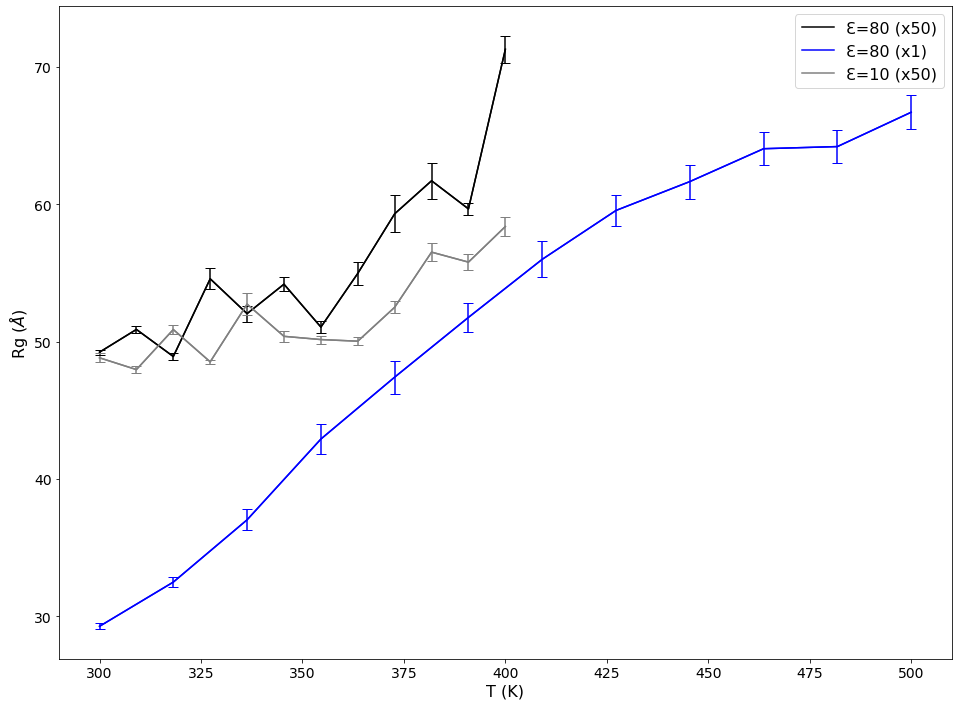

In [15]:
interplotty.clean()
interplotty.plot(observable='rg', index=6, plot_id="interg", color='black', label='Ɛ=80 (x50)')
interplotty.plot('rg', 2, plot_id="interg", label='Ɛ=80 (x1)', color='blue')
interplotty.plot(observable='rg', index=5, plot_id="interg", color='grey', label='Ɛ=10 (x50)')

For the **density profiles**

In [123]:
prf = analysis.Analysis(oliba_wd='/home/adria/data/prod/lammps/CPEB4x50/1.0ls-100I-80e')
rho = prf.density_profile()

DOING TEMPERATURE 0.00
500
DOING TEMPERATURE 1.00
500
DOING TEMPERATURE 2.00
500
DOING TEMPERATURE 3.00
500
DOING TEMPERATURE 4.00
500
DOING TEMPERATURE 5.00
500
DOING TEMPERATURE 6.00
500
DOING TEMPERATURE 7.00
500
DOING TEMPERATURE 8.00
500
DOING TEMPERATURE 9.00
500
DOING TEMPERATURE 10.00
500
DOING TEMPERATURE 11.00
500


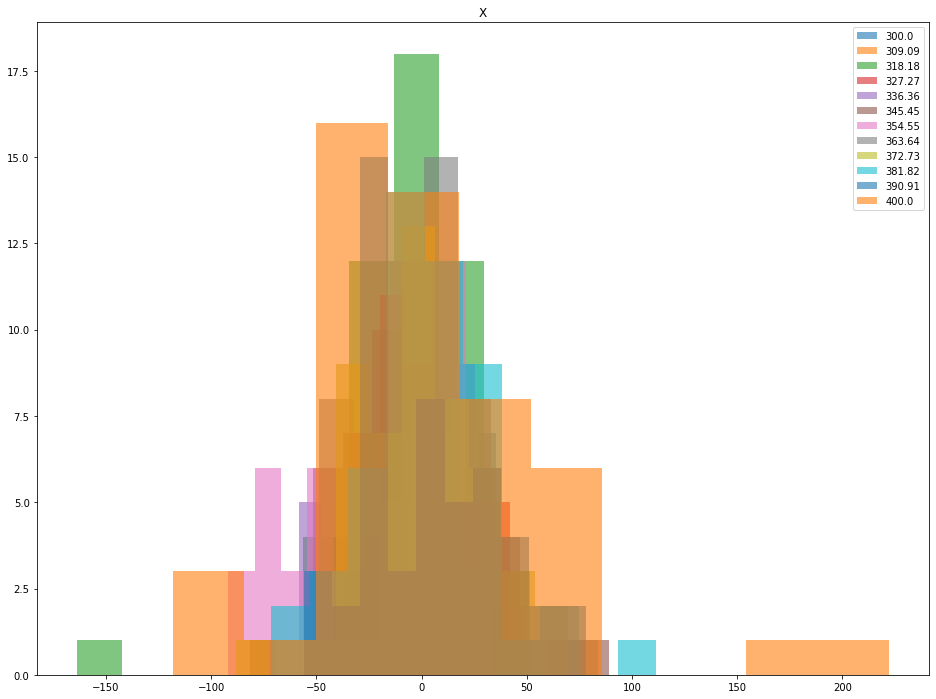

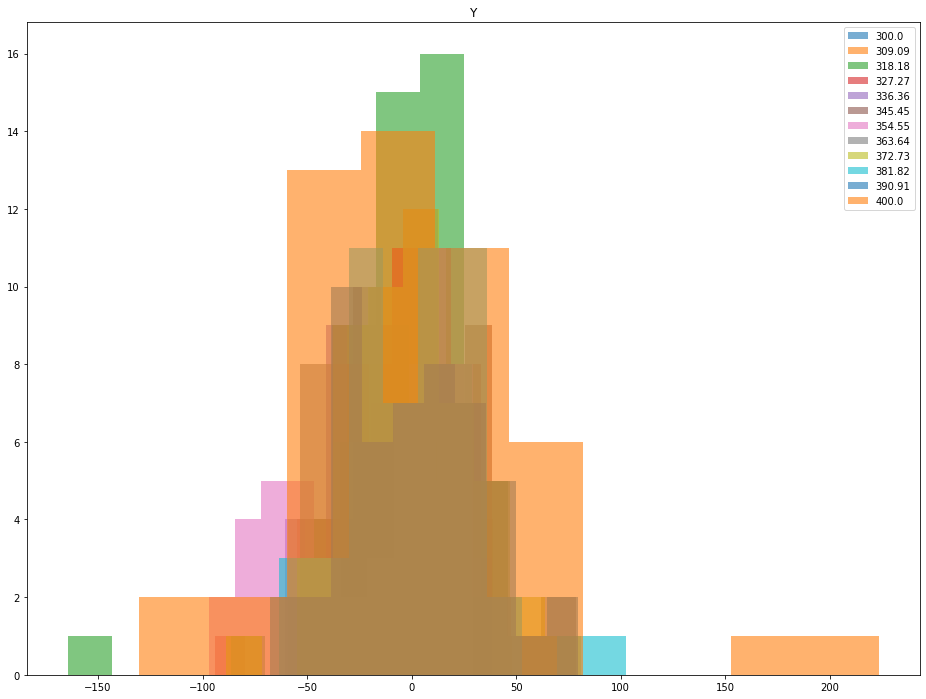

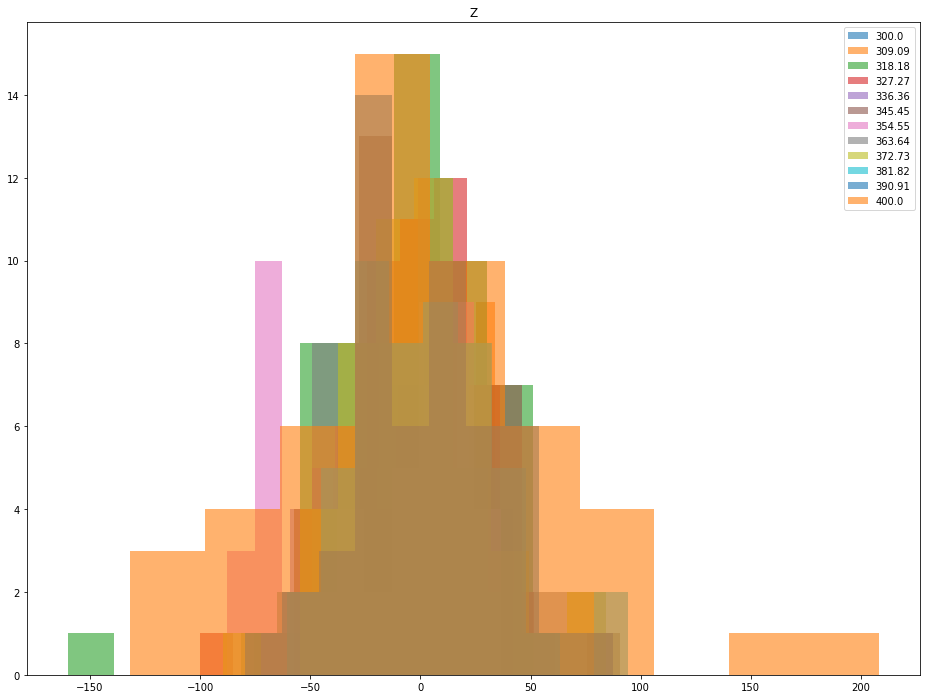

In [135]:
figx = plt.figure(figsize=(16,12))
plt.title("X")
for T in range(12):
    plt.hist(rho.mean(axis=2)[T,:,0], label=prf.get_temperatures()[T], alpha=0.6, bins=10)
plt.legend();

figy = plt.figure(figsize=(16,12))
plt.title("Y")
for T in range(12):
    plt.hist(rho.mean(axis=2)[T,:,1], label=prf.get_temperatures()[T], alpha=0.6, bins=10)
plt.legend();

figz = plt.figure(figsize=(16,12))
plt.title("Z")
for T in range(12):
    plt.hist(rho.mean(axis=2)[T,:,2], label=prf.get_temperatures()[T], alpha=0.6, bins=10)
plt.legend();

For the **contact maps** :

In [ ]:
interplotty.clean()
# interplotty.plot(observable='distance_map', index=6, inter=True)
interplotty.plot(observable='distance_map', index=6, contacts=True, inter=True)
# interplotty.plot(observable='distance_map', index=6, contacts=True, index2=5, log=True, inter=True)